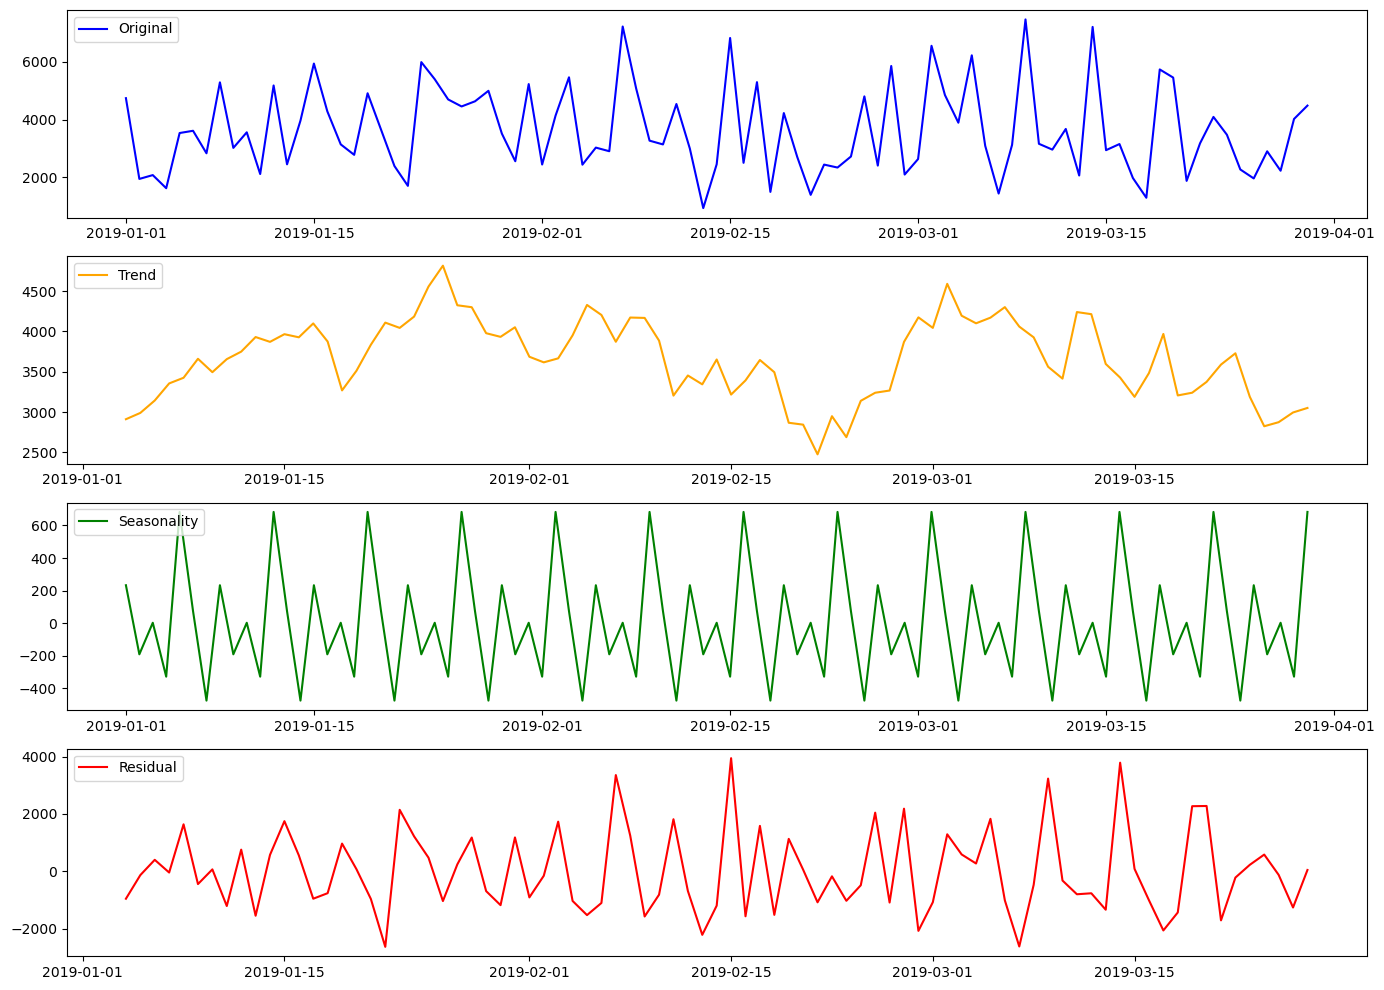

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file
df = pd.read_csv(r"C:\Users\exam\Downloads\supermarket_sales - Sheet1.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and sum the 'Total' sales
daily_sales = df.groupby('Date')['Total'].sum().sort_index()

# Resample to ensure uniform daily frequency
daily_sales = daily_sales.asfreq('D').fillna(method='ffill')  # Forward-fill missing dates

# Decompose the time series (Additive model)
decomposition = seasonal_decompose(daily_sales, model='additive', period=7)  # Weekly seasonality

# Plot the original, trend, seasonal, and residual components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(daily_sales, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
